<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/grokking-machine-learning/03-linear-regression/2_real_life_application_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Real-life application

In this notebook, I show you a real-life application. We’ll use linear regression to predict housing
prices in Hyderabad, India. 

The dataset we use comes from Kaggle, a popular site for machine
learning competitions.

Reference:

[Turi Create API Documentation](https://apple.github.io/turicreate/docs/api/)

[Turi Create](https://github.com/apple/turicreate)


In [ ]:
!wget !wget https://github.com/luisguiserrano/manning/raw/master/Chapter_3_Linear_Regression/utils.py

In [ ]:
!pip install turicreate

In [5]:
import turicreate as tc
import numpy as np
import matplotlib.pyplot as plt
import utils

In [ ]:
!wget https://github.com/luisguiserrano/manning/raw/master/Chapter_3_Linear_Regression/Hyderabad.csv

##Dataset

This dataset has 6,207 rows (one per house) and 39 columns (features).

Here, we
won’t code the algorithm by hand. Instead, we use Turi Create, a popular and useful package in
which many machine learning algorithms are implemented.

The main object to store data in Turi Create is the SFrame.

In [6]:
data = tc.SFrame("Hyderabad.csv")
data

Finished parsing file /content/Hyderabad.csv

Parsing completed. Parsed 100 lines in 0.030293 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/Hyderabad.csv

Parsing completed. Parsed 2518 lines in 0.01627 secs.

Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens
6968000,1340,Nizampet,2,0,0,1,1,1
29000000,3498,Hitech City,4,0,0,1,1,1
6590000,1318,Manikonda,2,0,0,1,0,0
5739000,1295,Alwal,3,1,0,0,0,0
5679000,1145,Kukatpally,2,0,0,0,0,1
6099000,1230,Nizampet,2,0,0,0,0,0
7000000,1350,Manikonda,2,0,0,0,0,0
4198000,1400,Gachibowli,3,0,0,1,1,0
9900000,2240,Tellapur,3,0,0,1,1,0
9800000,1520,Gachibowli,2,1,0,0,0,0


In [9]:
# The first five rows and six columns of the Hyderabad housing prices dataset
data.print_rows(num_rows=5, num_columns=6)

+----------+------+-------------+-----------------+--------+------------------+-----+
|  Price   | Area |   Location  | No. of Bedrooms | Resale | MaintenanceStaff | ... |
+----------+------+-------------+-----------------+--------+------------------+-----+
| 6968000  | 1340 |   Nizampet  |        2        |   0    |        0         | ... |
| 29000000 | 3498 | Hitech City |        4        |   0    |        0         | ... |
| 6590000  | 1318 |  Manikonda  |        2        |   0    |        0         | ... |
| 5739000  | 1295 |    Alwal    |        3        |   1    |        0         | ... |
| 5679000  | 1145 |  Kukatpally |        2        |   0    |        0         | ... |
+----------+------+-------------+-----------------+--------+------------------+-----+
[2518 rows x 40 columns]



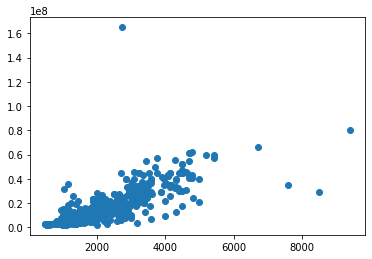

In [10]:
# Exploring the relationship between price and area
plt.scatter(data["Area"], data["Price"])

##Training model

Training a linear regression model in Turi Create takes only one line of code. 

We use the function
create from the package `linear_regression`. 

Let's train a model using fewer features. The create function allows us to input the
features we want to use as an array.

In [12]:
simple_model = tc.linear_regression.create(data, features=["Area"], target="Price")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.001157     | 144159379.638501   | 49158262.053704      | 4866680.723860                  | 5603620.916165                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [13]:
# check the coefficients
simple_model.coefficients

name,index,value,stderr
(intercept),None,-6572164.795643149,244149.32563429646
Area,None,9968.285511687916,135.77883617626605


In [14]:
# check the slope and bias
b, m = simple_model.coefficients["value"]
print(f"slope: {m}")
print(f"bias: {b}")

slope: 9968.285511687916
bias: -6572164.795643149


Let's draw a line with this slope and bias.

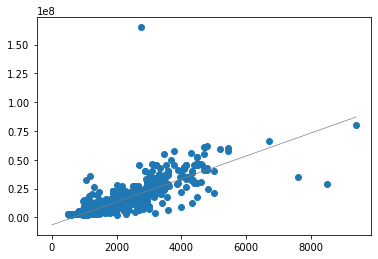

In [15]:
plt.scatter(data["Area"], data["Price"])
utils.draw_line(m, b, starting=0, ending=max(data["Area"]))

##Training final model

In [16]:
model = tc.linear_regression.create(data, target="Price")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 39

Number of unpacked features : 39

Number of coefficients    : 271

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.034163     | 140577434.075515   | 32077355.725100      | 4184686.376024                  | 4974605.741433                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [17]:
model.coefficients

name,index,value,stderr
(intercept),None,-3219993.232118191,605206.0790930862
Area,None,8967.40673275528,255.44636963123003
Location,Hitech City,4863690.9836690575,765633.2137227565
Location,Manikonda,-359876.2430571549,660728.5214906755
Location,Alwal,-695792.5884456297,1166738.0832176928
Location,Kukatpally,1807394.5200636243,642957.3142898864
Location,Gachibowli,4417257.825283726,738595.9478778807
Location,Tellapur,-975658.7009844278,1052205.3811007137
Location,Hyder Nagar,1711740.5329455556,2271707.459213792
Location,Mehdipatnam,44393.168674529225,1486953.5043156794


In [19]:
# evaluate the model
model.evaluate(data)

{'max_error': 140577434.07551467, 'rmse': 4227723.088354279}

We can use the model to predict the price of a house with an area of 1,000, and three bedrooms
as follows:

In [20]:
house = tc.SFrame({"Area": [1000], "No. of Bedrooms": [3]})
house

Area,No. of Bedrooms
1000,3


In [21]:
model.predict(house)

dtype: float
Rows: 1
[2245768.55800939]